# imports and initialization

In [1]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib
from g2p_en import G2p

from nejm_b2txt_utils.general_utils import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'sans-serif'

g2p = G2p()

# load Copy Task evaluation data

In [2]:
# load pickled data
with open('../data/t15_personalUse.pkl', 'rb') as f:
    dat = pickle.load(f)

t15_personal_use_trials = dat['trialized_info']
total_use_time = dat['total_use_time']
total_trial_count = dat['total_trial_count']

# plot cumulative use time and sentence count

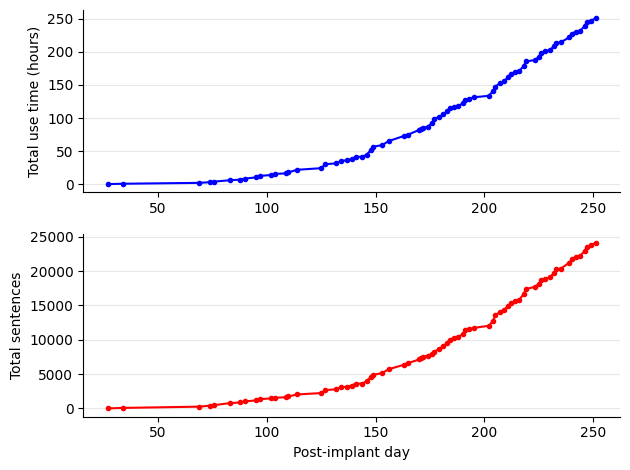

In [10]:
post_implant_day = []
total_use_time_by_day = []
total_sentences_by_day = []

for day in total_use_time.keys():

    if total_use_time[day] == 0:
        continue

    post_implant_day.append(day)
    total_use_time_by_day.append(total_use_time[day])
    total_sentences_by_day.append(total_trial_count[day])

post_implant_day = np.array(post_implant_day)
total_use_time_by_day = np.array(total_use_time_by_day) / 3600
total_sentences_by_day = np.array(total_sentences_by_day)

total_use_time_by_day_cumsum = np.cumsum(total_use_time_by_day)
total_sentences_by_day_cumsum = np.cumsum(total_sentences_by_day)

plt.figure()

plt.subplot(211)
plt.plot(post_implant_day, total_use_time_by_day_cumsum, 'b.-')
plt.ylabel('Total use time (hours)')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(212)
plt.plot(post_implant_day, total_sentences_by_day_cumsum, 'r.-')
plt.ylabel('Total sentences')
plt.xlabel('Post-implant day')
plt.grid(axis='y', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# plot sentence correctness

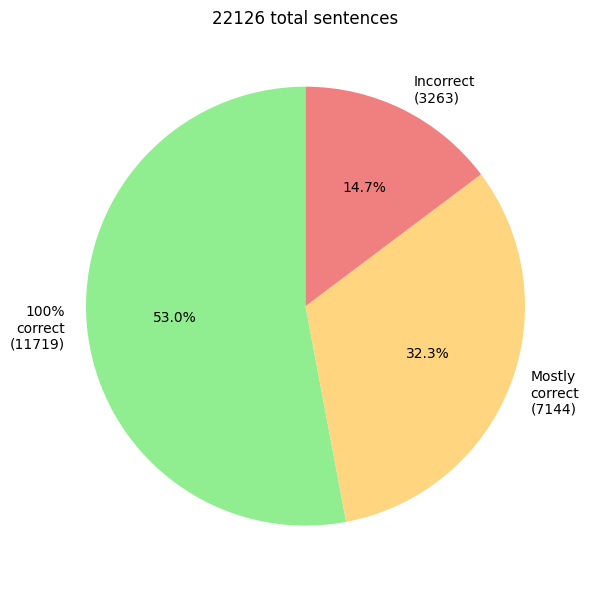

In [11]:
fully_correct_count = np.sum([c=="correct" for c in t15_personal_use_trials['correctness_rating']])
mostly_correct_count = np.sum([c=="mostly correct" for c in t15_personal_use_trials['correctness_rating']])
one_word_wrong_count = np.sum([c=="one word wrong" for c in t15_personal_use_trials['correctness_rating']])
incorrect_count = np.sum([c=="incorrect" for c in t15_personal_use_trials['correctness_rating']])

# pie chart
labels = [f'100%\ncorrect\n({fully_correct_count})', f'Mostly\ncorrect\n({one_word_wrong_count+mostly_correct_count})', f'Incorrect\n({incorrect_count})']
sizes = [fully_correct_count, one_word_wrong_count+mostly_correct_count, incorrect_count]
colors = ['lightgreen', (255/255, 213/255, 128/255), 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title(f'{fully_correct_count + one_word_wrong_count+mostly_correct_count + incorrect_count} total sentences')

plt.tight_layout()
plt.show()

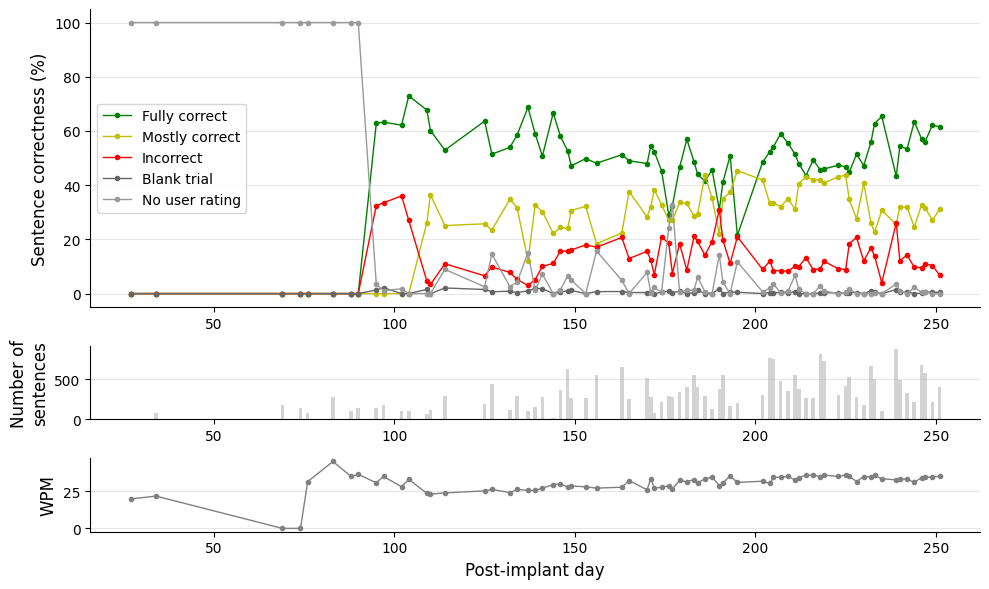

In [13]:
# correctness and wpm by day
unique_days = np.sort(np.unique(t15_personal_use_trials['post_implant_day']))

post_implant_day = []
num_trials_by_day = []
fully_correct_count_by_day = []
mostly_correct_count_by_day = []
one_word_wrong_count_by_day = []
incorrect_count_by_day = []
response_timeout_count_by_day = []
blank_trial_count_by_day = []
no_user_rating_count_by_day = []
wpm_by_day = []

for day in unique_days:
    ind = np.array(t15_personal_use_trials['post_implant_day'])==day

    if np.sum(ind) == 0:
        continue

    post_implant_day.append(day)
    num_trials_by_day.append(np.sum(ind))
    fully_correct_count_by_day.append(np.sum([c=="correct" for c in np.array(t15_personal_use_trials['correctness_rating'])[ind]]))
    mostly_correct_count_by_day.append(np.sum([c=="mostly correct" for c in np.array(t15_personal_use_trials['correctness_rating'])[ind]]))
    one_word_wrong_count_by_day.append(np.sum([c=="one word wrong" for c in np.array(t15_personal_use_trials['correctness_rating'])[ind]]))
    incorrect_count_by_day.append(np.sum([c=="incorrect" for c in np.array(t15_personal_use_trials['correctness_rating'])[ind]]))
    response_timeout_count_by_day.append(np.sum([c=="response timeout" for c in np.array(t15_personal_use_trials['correctness_rating'])[ind]]))
    blank_trial_count_by_day.append(np.sum([c=="blank trial" for c in np.array(t15_personal_use_trials['correctness_rating'])[ind]]))
    no_user_rating_count_by_day.append(np.sum([c=="no user rating" for c in np.array(t15_personal_use_trials['correctness_rating'])[ind]]))

    if np.all(np.isnan(np.array(t15_personal_use_trials['wpm'])[ind])):
        wpm_by_day.append(0)
    else:
        wpm_by_day.append(np.nanmean(np.array(t15_personal_use_trials['wpm'])[ind]))

post_implant_day = np.array(post_implant_day)
fully_correct_count_by_day = np.array(fully_correct_count_by_day)
mostly_correct_count_by_day = np.array(mostly_correct_count_by_day)
one_word_wrong_count_by_day = np.array(one_word_wrong_count_by_day)
incorrect_count_by_day = np.array(incorrect_count_by_day)
response_timeout_count_by_day = np.array(response_timeout_count_by_day)
blank_trial_count_by_day = np.array(blank_trial_count_by_day)
no_user_rating_count_by_day = np.array(no_user_rating_count_by_day)
wpm_by_day = np.array(wpm_by_day)


# plot
plt.figure(figsize=(10, 6))

plt.subplot2grid((5, 1), (0, 0), rowspan=3)
plt.plot(post_implant_day, fully_correct_count_by_day / num_trials_by_day * 100, 'g.-', label='Fully correct', linewidth=1)
plt.plot(post_implant_day, (mostly_correct_count_by_day + one_word_wrong_count_by_day) / num_trials_by_day * 100, 'y.-', label='Mostly correct', linewidth=1)
plt.plot(post_implant_day, incorrect_count_by_day / num_trials_by_day * 100, 'r.-', label='Incorrect', linewidth=1)
plt.plot(post_implant_day, blank_trial_count_by_day / num_trials_by_day * 100, '.-', label='Blank trial', color=(0.4, 0.4, 0.4), linewidth=1)
plt.plot(post_implant_day, (response_timeout_count_by_day + no_user_rating_count_by_day) / num_trials_by_day * 100, '.-', label='No user rating', color=(0.6, 0.6, 0.6), linewidth=1)
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
xlimits = plt.xlim()
plt.ylabel('Sentence correctness (%)', fontsize=12)

plt.subplot2grid((5, 1), (3, 0))
# bar plot of total number of sentences per day
plt.bar(post_implant_day, fully_correct_count_by_day + one_word_wrong_count_by_day + mostly_correct_count_by_day + incorrect_count_by_day + blank_trial_count_by_day + response_timeout_count_by_day + no_user_rating_count_by_day, color='lightgray', width=1)
plt.xlim(xlimits)
plt.ylabel('Number of\nsentences', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot2grid((5, 1), (4, 0))
# line plot of wpm
plt.plot(post_implant_day, wpm_by_day, '.-', color=(0.5, 0.5, 0.5), linewidth=1)
plt.xlim(xlimits)
plt.xlabel('Post-implant day', fontsize=12)
plt.ylabel('WPM', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()